Fatemeh Zahedi HW5 1215240130 STP 598

Problem 1

In [2]:
### import

### basic 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import math

import seaborn as sns; sns.set()
#%matplotlib inline

### random number generator
from numpy.random import default_rng

##sklearn learners
from sklearn.tree import DecisionTreeRegressor 

##sklearn metrics
from sklearn.metrics import mean_squared_error

##sklearn model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

## to visualize a tree
import pydotplus
from sklearn import tree
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras import regularizers

### sklearn model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

def myrmse(y,yhat):
   """ print out rmse with 3 digits"""
   rmse = math.sqrt(mean_squared_error(y,yhat))
   return(np.round(rmse,3))

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [8]:
cd = pd.read_csv("http://www.rob-mcculloch.org/data/susedcars.csv")
cd = cd[['price','mileage','year']]
cd['price'] = cd['price']/1000
cd['mileage'] = cd['mileage']/1000
X = cd.iloc[:,[1]].to_numpy() 
y = cd['price'].to_numpy()

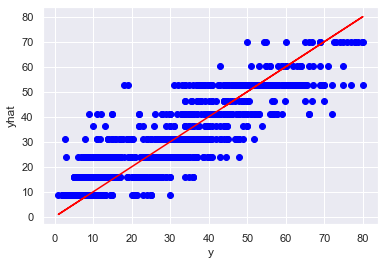

number of bottom  nodes:  10


In [11]:
# tree with at most 10 bottom nodes
tmod = DecisionTreeRegressor(max_leaf_nodes=10)
tmod.fit(X,y)

## look at in-sample fits
yhat = tmod.predict(X)

plt.scatter(y,yhat,c='blue')
plt.xlabel('y'); plt.ylabel('yhat')
plt.plot(y,y,c='red')
plt.show()
print("number of bottom  nodes: ",pd.Series(yhat).nunique())

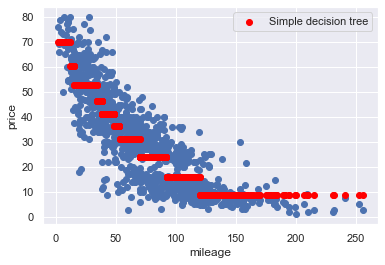

In [13]:
plt.scatter(X,y)
plt.scatter(X,yhat,c='red',label="Simple decision tree") #add the line
plt.xlabel('mileage'); plt.ylabel('price')
plt.legend()

In [14]:
error = math.sqrt(mean_squared_error(np.exp(y),np.exp(yhat)))
print(error)

2.982778981882594e+33


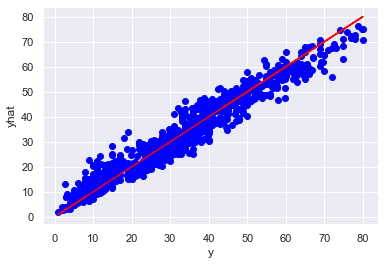

number of bottom  nodes:  10


In [25]:
rfm = RandomForestRegressor(random_state=0,n_jobs=-1,n_estimators=500,max_features=1)
rfm.fit(X,y) 
yhrf = rfm.predict(X)
plt.scatter(y,yhrf,c='blue')
plt.xlabel('y'); plt.ylabel('yhat')
plt.plot(y,y,c='red')
plt.show()
print("number of bottom  nodes: ",pd.Series(yhat).nunique())

2.960697672274059e+33


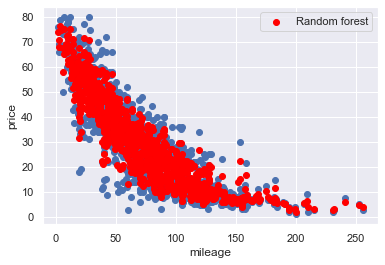

In [30]:
plt.scatter(X,y)
plt.scatter(X,yhrf,c='red',label="Random forest") #add the line
plt.xlabel('mileage'); plt.ylabel('price')
plt.legend()
error = math.sqrt(mean_squared_error(np.exp(y),np.exp(yhrf)))
print(error)

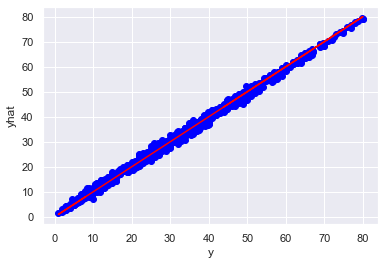

number of bottom  nodes:  10


In [33]:
gbm = GradientBoostingRegressor(learning_rate=.2,n_estimators=500,max_depth=5)
gbm.fit(X,y)
yhgb = gbm.predict(X)
plt.scatter(y,yhgb,c='blue')
plt.xlabel('y'); plt.ylabel('yhat')
plt.plot(y,y,c='red')
plt.show()
print("number of bottom  nodes: ",pd.Series(yhat).nunique())

1.4510388170341965e+33


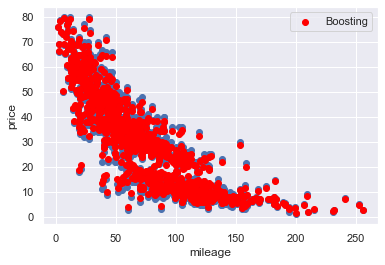

In [34]:
plt.scatter(X,y)
plt.scatter(X,yhgb,c='red',label="Boosting") #add the line
plt.xlabel('mileage'); plt.ylabel('price')
plt.legend()
error = math.sqrt(mean_squared_error(np.exp(y),np.exp(yhgb)))
print(error)

It seems boosting works better than the others, and random forest works better than the single tree

In [35]:
n = cd.shape[0] #sample size
p = cd.shape[1]-1
print('n,p: ',n,p)

n,p:  1000 2


In [36]:
### train, val, test
rng = np.random.default_rng(seed=34) # Auston Matthews
ii = rng.choice(range(n),size=n,replace=False)

n1 = math.floor(n/2.0) # half the data in train
n2 = math.floor(n/4.0) # quarter of the data in train
n3 = n-n1-n2
ii1 = ii[:n1]; x1 = X[ii1]; y1 = y[ii1] #train
ii2 = ii[n1 + np.arange(n2)]; x2 = X[ii2]; y2 = y[ii2] #val
ii3 = ii[n1 + n2 + np.arange(n3)]; x3 = X[ii3]; y3 = y[ii3] #test

rmse from dt, fit on train, predict on val:  6.518


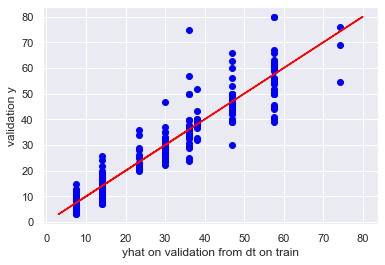

In [55]:
#Simple tree
tmod = DecisionTreeRegressor(max_leaf_nodes=10)
tmod.fit(x1,y1)

## look at in-sample fits
yhat2 = tmod.predict(x2)
plt.scatter(yhat2,y2,c='blue')
plt.plot(y2,y2,c='red')
plt.xlabel('yhat on validation from dt on train');plt.ylabel('validation y')

print('rmse from dt, fit on train, predict on val: ',myrmse(y2,yhat2))

rmse from dt, fit on train+val, predict on test:  6.458


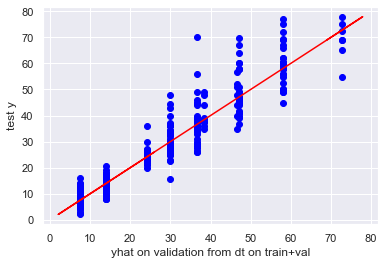

In [56]:
x12 = np.vstack([x1,x2]); y12 = np.concatenate([y1,y2])
tmod.fit(x12,y12)
yhat3 = tmod.predict(x3)
plt.scatter(yhat3,y3,c='blue')
plt.plot(y3,y3,c='red')
plt.xlabel('yhat on validation from dt on train+val');plt.ylabel('test y')
print('rmse from dt, fit on train+val, predict on test: ',myrmse(y3,yhat3))

rmse from rf, fit on train, predict on val:  11.24


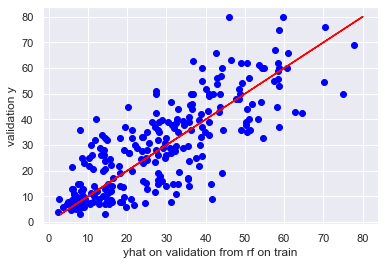

In [44]:
#random forest
rfm = RandomForestRegressor(random_state=0,n_jobs=-1,n_estimators=500,max_features=1)
rfm.fit(x1,y1) # fit on train
## predict on val
yhrf = rfm.predict(x2)
plt.scatter(yhrf,y2,c='blue')
plt.plot(y2,y2,c='red')
plt.xlabel('yhat on validation from rf on train');plt.ylabel('validation y')

print('rmse from rf, fit on train, predict on val: ',myrmse(y2,yhrf))


rmse from rf, fit on train+val, predict on test:  10.768


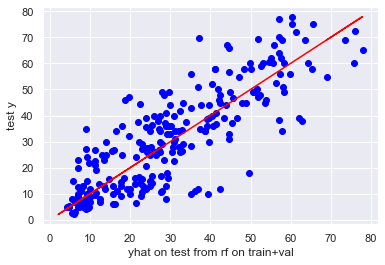

In [47]:
rfm.fit(x12,y12) # fit on train
## predict on val
yhrf3 = rfm.predict(x3)
plt.scatter(yhrf3,y3,c='blue')
plt.plot(y3,y3,c='red')
plt.xlabel('yhat on test from rf on train+val');plt.ylabel('test y')

print('rmse from rf, fit on train+val, predict on test: ',myrmse(y3,yhrf3))

rmse from gb, fit on train, predict on val:  13.082


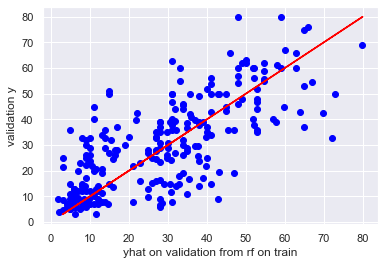

In [48]:
#boosting
gbm = GradientBoostingRegressor(learning_rate=.2,n_estimators=5000,max_depth=4)
gbm.fit(x1,y1)
yhgb = gbm.predict(x2)
plt.scatter(yhgb,y2,c='blue')
plt.plot(y2,y2,c='red')
plt.xlabel('yhat on validation from rf on train');plt.ylabel('validation y')

print('rmse from gb, fit on train, predict on val: ',myrmse(y2,yhgb))

rmse from gb, fit on train+val, predict on test:  12.151


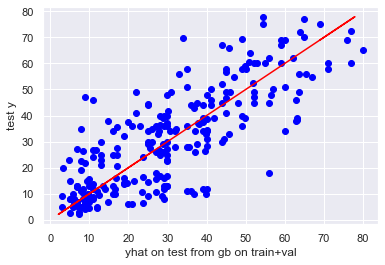

In [49]:
gbm.fit(x12,y12)
yhgb3 = gbm.predict(x3)
plt.scatter(yhgb3,y3,c='blue')
plt.plot(y3,y3,c='red')
plt.xlabel('yhat on test from gb on train+val');plt.ylabel('test y')

print('rmse from gb, fit on train+val, predict on test: ',myrmse(y3,yhgb3))

In [51]:
## compare boosting to rf to dt 
yhdf = pd.DataFrame({'y2':y2,'yhdt':yhat2, 'yhrf':yhrf,'yhgb':yhgb})
print(yhdf.corr())

            y2      yhdt      yhrf      yhgb
y2    1.000000  0.846010  0.796850  0.742758
yhdt  0.846010  1.000000  0.943365  0.884358
yhrf  0.796850  0.943365  1.000000  0.977489
yhgb  0.742758  0.884358  0.977489  1.000000


In [52]:
## compare boosting to rf to dt
yhdf = pd.DataFrame({'y3':y3,'yhdt':yhat3, 'yhrf':yhrf3,'yhgb':yhgb3})
print(yhdf.corr())

            y3      yhdt      yhrf      yhgb
y3    1.000000  0.868559  0.836273  0.796806
yhdt  0.868559  1.000000  0.945074  0.893809
yhrf  0.836273  0.945074  1.000000  0.980300
yhgb  0.796806  0.893809  0.980300  1.000000


Based on both rmse and correlation, simple tree worked better than the others. And after that based on both rmse and correlation, random forest worked better than the boosting.

Problem 2

In [53]:
X = cd.iloc[:,[1,2]].to_numpy() 
y = cd['price'].to_numpy()

In [54]:
### train, val, test
rng = np.random.default_rng(seed=34) # Auston Matthews
ii = rng.choice(range(n),size=n,replace=False)

n1 = math.floor(n/2.0) # half the data in train
n2 = math.floor(n/4.0) # quarter of the data in train
n3 = n-n1-n2
ii1 = ii[:n1]; x1 = X[ii1]; y1 = y[ii1] #train
ii2 = ii[n1 + np.arange(n2)]; x2 = X[ii2]; y2 = y[ii2] #val
ii3 = ii[n1 + n2 + np.arange(n3)]; x3 = X[ii3]; y3 = y[ii3] #test

rmse from dt, fit on train, predict on val:  6.518


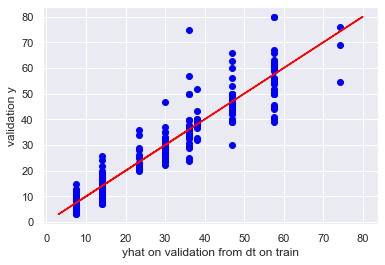

In [58]:
#Simple tree
tmod = DecisionTreeRegressor(max_leaf_nodes=10)
tmod.fit(x1,y1)

## look at in-sample fits
yhat2 = tmod.predict(x2)
plt.scatter(yhat2,y2,c='blue')
plt.plot(y2,y2,c='red')
plt.xlabel('yhat on validation from dt on train');plt.ylabel('validation y')
print('rmse from dt, fit on train, predict on val: ',myrmse(y2,yhat2))

rmse from dt, fit on train+val, predict on test:  6.458


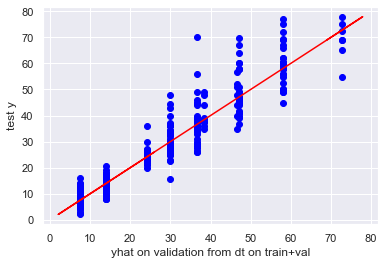

In [59]:
x12 = np.vstack([x1,x2]); y12 = np.concatenate([y1,y2])
tmod.fit(x12,y12)
yhat3 = tmod.predict(x3)
plt.scatter(yhat3,y3,c='blue')
plt.plot(y3,y3,c='red')
plt.xlabel('yhat on validation from dt on train+val');plt.ylabel('test y')
print('rmse from dt, fit on train+val, predict on test: ',myrmse(y3,yhat3))

rmse from rf, fit on train, predict on val:  6.303


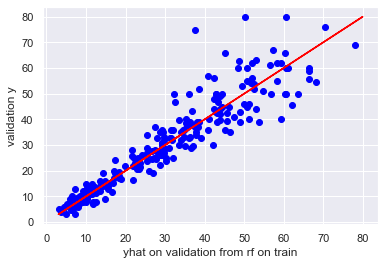

In [60]:
#random forest
rfm = RandomForestRegressor(random_state=0,n_jobs=-1,n_estimators=500,max_features=1)
rfm.fit(x1,y1) # fit on train
## predict on val
yhrf = rfm.predict(x2)
plt.scatter(yhrf,y2,c='blue')
plt.plot(y2,y2,c='red')
plt.xlabel('yhat on validation from rf on train');plt.ylabel('validation y')

print('rmse from rf, fit on train, predict on val: ',myrmse(y2,yhrf))

rmse from rf, fit on train+val, predict on test:  5.753


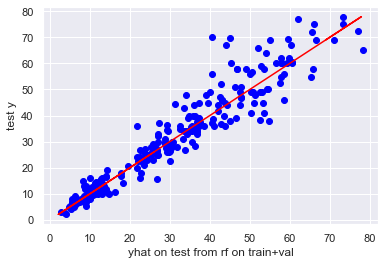

In [61]:
rfm.fit(x12,y12) # fit on train
## predict on val
yhrf3 = rfm.predict(x3)
plt.scatter(yhrf3,y3,c='blue')
plt.plot(y3,y3,c='red')
plt.xlabel('yhat on test from rf on train+val');plt.ylabel('test y')

print('rmse from rf, fit on train+val, predict on test: ',myrmse(y3,yhrf3))

rmse from gb, fit on train, predict on val:  6.965


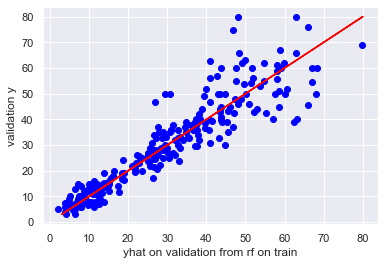

In [62]:
#boosting
gbm = GradientBoostingRegressor(learning_rate=.2,n_estimators=5000,max_depth=4)
gbm.fit(x1,y1)
yhgb = gbm.predict(x2)
plt.scatter(yhgb,y2,c='blue')
plt.plot(y2,y2,c='red')
plt.xlabel('yhat on validation from rf on train');plt.ylabel('validation y')

print('rmse from gb, fit on train, predict on val: ',myrmse(y2,yhgb))

rmse from gb, fit on train+val, predict on test:  6.797


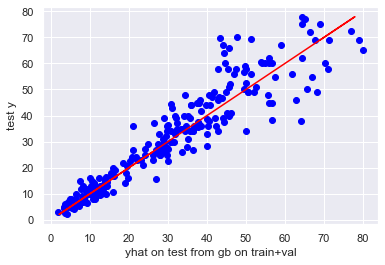

In [63]:
gbm.fit(x12,y12)
yhgb3 = gbm.predict(x3)
plt.scatter(yhgb3,y3,c='blue')
plt.plot(y3,y3,c='red')
plt.xlabel('yhat on test from gb on train+val');plt.ylabel('test y')

print('rmse from gb, fit on train+val, predict on test: ',myrmse(y3,yhgb3))

In [64]:
## compare boosting to rf to dt 
yhdf = pd.DataFrame({'y2':y2,'yhdt':yhat2, 'yhrf':yhrf,'yhgb':yhgb})
print(yhdf.corr())

            y2      yhdt      yhrf      yhgb
y2    1.000000  0.933642  0.938000  0.924744
yhdt  0.933642  1.000000  0.975549  0.961606
yhrf  0.938000  0.975549  1.000000  0.982123
yhgb  0.924744  0.961606  0.982123  1.000000


In [65]:
## compare boosting to rf to dt
yhdf = pd.DataFrame({'y3':y3,'yhdt':yhat3, 'yhrf':yhrf3,'yhgb':yhgb3})
print(yhdf.corr())

            y3      yhdt      yhrf      yhgb
y3    1.000000  0.944107  0.955911  0.938071
yhdt  0.944107  1.000000  0.972671  0.951813
yhrf  0.955911  0.972671  1.000000  0.979578
yhgb  0.938071  0.951813  0.979578  1.000000


Based on both rmse and correlation, random forest worked better than the others. And after that based on both rmse and correlation, simple tree worked better than the boosting.

Problem 3

In [3]:
cd = pd.read_csv("http://www.rob-mcculloch.org/data/susedcars.csv")
cd = cd[['price','mileage','year']]
cd['price'] = cd['price']/1000
cd['mileage'] = cd['mileage']/1000
X = cd.iloc[:,[1]].to_numpy() 
y = cd['price'].to_numpy()

In [4]:
n = cd.shape[0] #sample size
p = cd.shape[1]-1
print('n,p: ',n,p)

n,p:  1000 2


In [6]:
### train, val, test
rng = np.random.default_rng(seed=34) # Auston Matthews
ii = rng.choice(range(n),size=n,replace=False)

n1 = math.floor(n/2.0) # half the data in train
n2 = math.floor(n/4.0) # quarter of the data in train
n3 = n-n1-n2
ii1 = ii[:n1]; x1 = X[ii1]; y1 = y[ii1] #train
ii2 = ii[n1 + np.arange(n2)]; x2 = X[ii2]; y2 = y[ii2] #val
ii3 = ii[n1 + n2 + np.arange(n3)]; x3 = X[ii3]; y3 = y[ii3] #test
x12 = np.vstack([x1,x2]); y12 = np.concatenate([y1,y2])

means should be 0, sds should be 1
[1.687539e-16]
[1.]


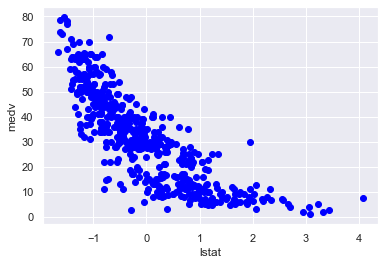

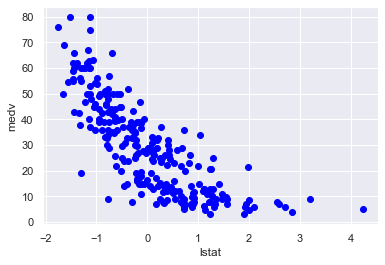

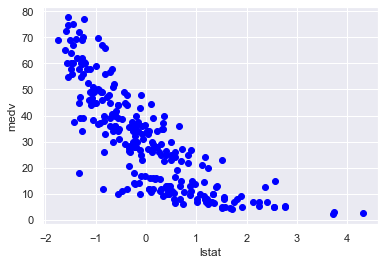

In [12]:
## scale
scl = StandardScaler()
Xtr = scl.fit_transform(x1)
Xval = scl.fit_transform(x2)
Xte = scl.transform(x3)
print("means should be 0, sds should be 1")
print(Xtr.mean(axis=0))
print(Xtr.std(axis=0))

## pull off lstat
Xtr1 = Xtr[:][:,np.newaxis]
Xval1 = Xval[:][:,np.newaxis]
Xte1 = Xte[:][:,np.newaxis]

## our familiar plot
plt.scatter(Xtr1,y1,c='blue')
plt.xlabel("lstat"); plt.ylabel("medv")
plt.show()

plt.scatter(Xval1,y2,c='blue')
plt.xlabel("lstat"); plt.ylabel("medv")
plt.show()

plt.scatter(Xte1,y3,c='blue')
plt.xlabel("lstat"); plt.ylabel("medv")
plt.show()

 - val_mse: 89.3505


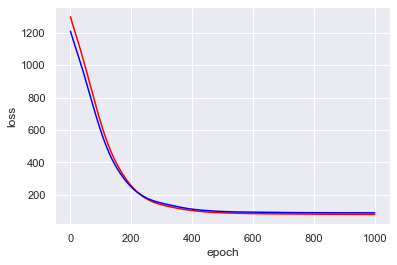

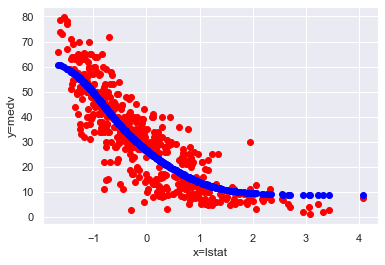

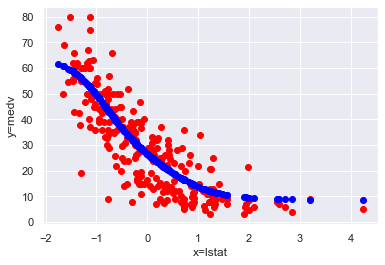

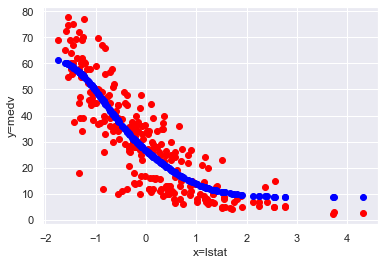

In [16]:
### fit neural net with small number of units and not much L2 regularization

#make model
lp2pen = .001
nx = Xtr1.shape[1]
nn1 = models.Sequential()
nn1.add(layers.Dense(units=5,activation='sigmoid',kernel_regularizer = regularizers.l2(lp2pen),input_shape=(nx,)))
nn1.add(layers.Dense(units=1))

#compile model
nn1.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

# fit
nhist = nn1.fit(Xtr1,y1,epochs=1000,verbose=1,batch_size=20,validation_data=(Xval1,y2))

### plot training by epoch
trL = nhist.history['loss']
teL = nhist.history['val_loss']
epind = range(1,len(trL)+1)
plt.plot(epind,trL,c='red')
plt.plot(epind,teL,c='blue')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.show()

### plot fit -in sample
yhtr = nn1.predict(Xtr1)
plt.scatter(Xtr1,y1,c='red')
plt.scatter(Xtr1,yhtr,c='blue')
plt.xlabel('x=lstat'); plt.ylabel('y=medv')
plt.show()

yhval = nn1.predict(Xval1)
plt.scatter(Xval1,y2,c='red')
plt.scatter(Xval1,yhval,c='blue')
plt.xlabel('x=lstat'); plt.ylabel('y=medv')
plt.show()

### plot fit -out sample
yhte = nn1.predict(Xte1)
plt.scatter(Xte1,y3,c='red')
plt.scatter(Xte1,yhte,c='blue')
plt.xlabel('x=lstat'); plt.ylabel('y=medv')
plt.show()

 - val_mse: 89.3462


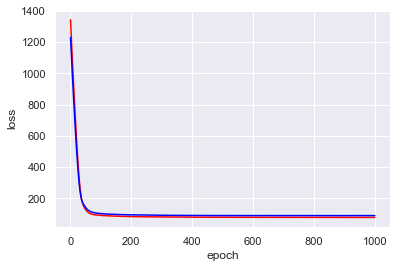

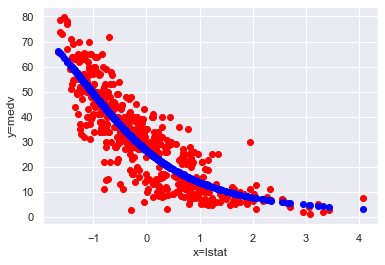

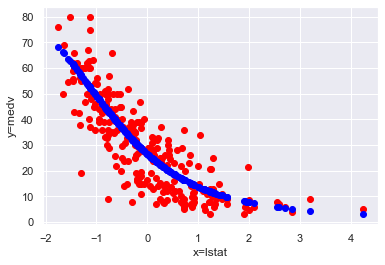

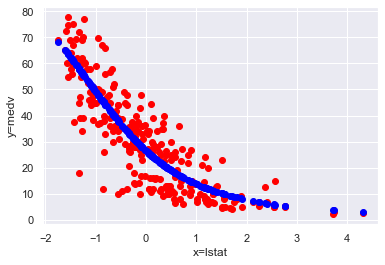

In [17]:
### fit neural net with large number of units and L2 regularization

#make model
lp2pen = .01
nx = Xtr1.shape[1]
nn2 = models.Sequential()
nn2.add(layers.Dense(units=50,activation='sigmoid',kernel_regularizer = regularizers.l2(lp2pen),input_shape=(nx,)))
nn2.add(layers.Dense(units=1))

#compile model
nn2.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

# fit
# fit
nhist = nn2.fit(Xtr1,y1,epochs=1000,verbose=1,batch_size=20,validation_data=(Xval1,y2))

### plot training by epoch
trL = nhist.history['loss']
teL = nhist.history['val_loss']
epind = range(1,len(trL)+1)
plt.plot(epind,trL,c='red')
plt.plot(epind,teL,c='blue')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.show()

### plot fit -in sample
yhtr = nn2.predict(Xtr1)
plt.scatter(Xtr1,y1,c='red')
plt.scatter(Xtr1,yhtr,c='blue')
plt.xlabel('x=lstat'); plt.ylabel('y=medv')
plt.show()

yhval = nn2.predict(Xval1)
plt.scatter(Xval1,y2,c='red')
plt.scatter(Xval1,yhval,c='blue')
plt.xlabel('x=lstat'); plt.ylabel('y=medv')
plt.show()

### plot fit -out sample
yhte = nn2.predict(Xte1)
plt.scatter(Xte1,y3,c='red')
plt.scatter(Xte1,yhte,c='blue')
plt.xlabel('x=lstat'); plt.ylabel('y=medv')
plt.show()

Problem 4

In [18]:
X = cd.iloc[:,[1,2]].to_numpy() 
y = cd['price'].to_numpy()

In [20]:
### train, val, test
rng = np.random.default_rng(seed=34) # Auston Matthews
ii = rng.choice(range(n),size=n,replace=False)

n1 = math.floor(n/2.0) # half the data in train
n2 = math.floor(n/4.0) # quarter of the data in train
n3 = n-n1-n2
ii1 = ii[:n1]; x1 = X[ii1]; y1 = y[ii1] #train
ii2 = ii[n1 + np.arange(n2)]; x2 = X[ii2]; y2 = y[ii2] #val
ii3 = ii[n1 + n2 + np.arange(n3)]; x3 = X[ii3]; y3 = y[ii3] #test

In [26]:
## scale
scl = StandardScaler()
Xtr = scl.fit_transform(x1)
Xval = scl.fit_transform(x2)
Xte = scl.transform(x3)
print("means should be 0, sds should be 1")
print(Xtr.mean(axis=0))
print(Xtr.std(axis=0))

## pull off lstat
Xtr1 = Xtr[:,1][:,np.newaxis]
Xval1 = Xval[:,1][:,np.newaxis]
Xte1 = Xte[:,1][:,np.newaxis]


means should be 0, sds should be 1
[5.19362331e-16 2.76038081e-14]
[1. 1.]


5


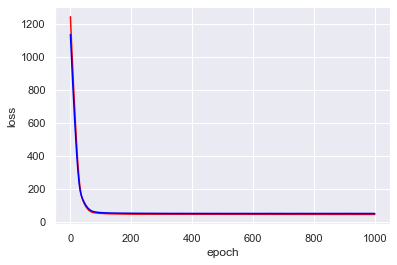

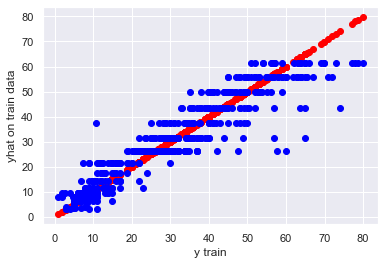

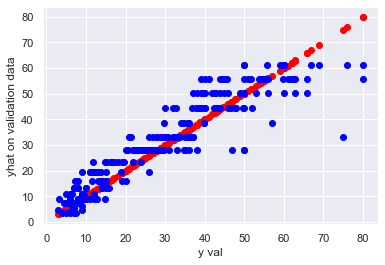

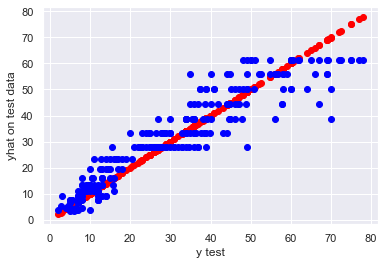

In [27]:
### fit neural net with large number of units and L2 regularization

#make model
lp2pen = .01
nx = Xtr1.shape[1]
nn2 = models.Sequential()
nn2.add(layers.Dense(units=50,activation='sigmoid',kernel_regularizer = regularizers.l2(lp2pen),input_shape=(nx,)))
nn2.add(layers.Dense(units=1))

#compile model
nn2.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

# fit
# fit
nhist = nn2.fit(Xtr1,y1,epochs=1000,verbose=1,batch_size=20,validation_data=(Xval1,y2))

### plot training by epoch
trL = nhist.history['loss']
teL = nhist.history['val_loss']
epind = range(1,len(trL)+1)
plt.plot(epind,trL,c='red')
plt.plot(epind,teL,c='blue')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.show()

### plot fit -in sample
yhtr = nn2.predict(Xtr1)
plt.scatter(y1,y1,c='red')
plt.scatter(y1,yhtr,c='blue')
plt.xlabel('y train'); plt.ylabel('yhat on train data')
plt.show()

yhval = nn2.predict(Xval1)
plt.scatter(y2,y2,c='red')
plt.scatter(y2,yhval,c='blue')
plt.xlabel('y val'); plt.ylabel('yhat on validation data')
plt.show()

### plot fit -out sample
yhte = nn2.predict(Xte1)
plt.scatter(y3,y3,c='red')
plt.scatter(y3,yhte,c='blue')
plt.xlabel('y test'); plt.ylabel('yhat on test data')
plt.show()